In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
df_bit=pd.read_csv("./Bitcoin.csv")
df_eth=pd.read_csv("./Ethereum.csv")



In [33]:
new_column_names=df_bit.iloc[0]
df_bit.rename(columns=new_column_names, inplace=True)

In [34]:
df_bit.info()
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         16 non-null     object
 1   Yearly consumption, TWh      16 non-null     object
 2   Cumulative consumption, TWh  16 non-null     object
dtypes: object(3)
memory usage: 512.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         4 non-null      int64  
 1   Yearly consumption, GWh      4 non-null      float64
 2   Cumulative consumption, GWh  4 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 224.0 bytes


In [35]:
new_df_bit=df_bit.iloc[12:]
new_df_bit.reset_index(drop=True, inplace=True)
new_df_bit


,Year,"Yearly consumption, TWh","Cumulative consumption, TWh"
0,2021,89.0021,282.3955
1,2022,95.5296,377.9251
2,2023,121.134,499.0591
3,2024,28.2849,527.344


In [37]:
df_eth['Year'] = pd.to_datetime(df_eth['Year'], format='%Y')
new_df_bit['Year'] = pd.to_datetime(new_df_bit['Year'], format='%Y')

/Users/kannavsethi/opt/anaconda3/envs/SEA400/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
df_eth['Year'] = df_eth['Year'].dt.year
new_df_bit['Year'] = new_df_bit['Year'].dt.year

/Users/kannavsethi/opt/anaconda3/envs/SEA400/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
df_eth
new_df_bit

,Year,"Yearly consumption, TWh","Cumulative consumption, TWh"
0,2021,89.0021,282.3955
1,2022,95.5296,377.9251
2,2023,121.134,499.0591
3,2024,28.2849,527.344


In [52]:
new_df_bit[["Yearly consumption, TWh","Cumulative consumption, TWh"]] = new_df_bit[["Yearly consumption, TWh","Cumulative consumption, TWh"]].astype(float)
df_eth[["Yearly consumption, GWh","Cumulative consumption, GWh"]] = new_df_bit[["Yearly consumption, TWh","Cumulative consumption, TWh"]].astype(float)

/Users/kannavsethi/opt/anaconda3/envs/SEA400/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [53]:
new_df_bit['Yearly consumption, GWh'] = new_df_bit['Yearly consumption, TWh'] * 1000

/Users/kannavsethi/opt/anaconda3/envs/SEA400/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
df_eth


,Year,"Yearly consumption, GWh","Cumulative consumption, GWh"
0,2021,89.0021,282.3955
1,2022,95.5296,377.9251
2,2023,121.1340,499.0591
3,2024,28.2849,527.3440


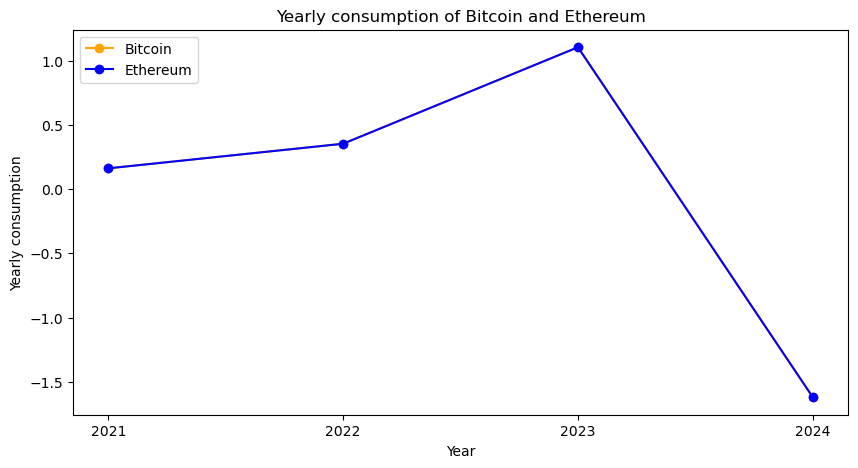

In [66]:
plt.figure(figsize=(10,5))
plt.plot(new_df_bit["Year"],new_df_bit["Yearly consumption, GWh"],linestyle='-',label='Bitcoin',color='orange',marker='o')
plt.plot(df_eth["Year"],df_eth["Yearly consumption, GWh"],linestyle='-',label='Ethereum',color='blue',marker='o')
plt.xlabel('Year')
plt.ylabel('Yearly consumption')  
plt.title('Yearly consumption of Bitcoin and Ethereum')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show() 
